In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("plasma")

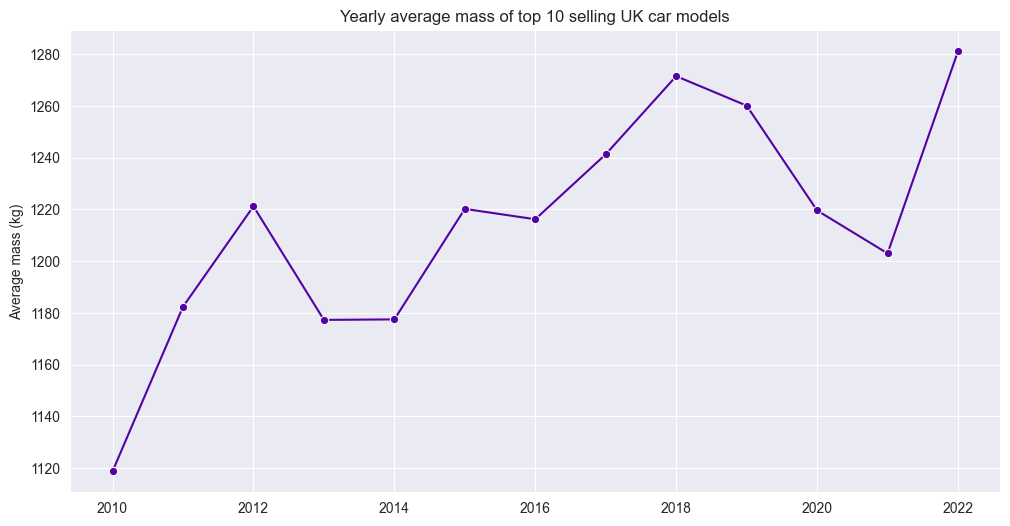

In [217]:
# Yearly average mass of top ten car models

# Load the car model and weight information from Sheet 2
weight_df = pd.read_excel('Car_stats.xlsx', sheet_name='Car weight and CO2')
weight_df['Model']=weight_df['Model'].astype(str)

# Create a dictionary that maps (Model, Year) to Weight
car_weights = {(model, year): weight for model, year, weight in zip(weight_df['Model'], weight_df['Year'], weight_df['Weight kg'])}

# Load the sales data from Sheet 1
sales_df = pd.read_excel('Car_stats.xlsx', sheet_name='Top 10 sold')

# Initialize a dictionary to store the results
yearly_average_weights = {}

# Iterate through the year columns
for year in range(2010, 2023):
    total_weight = 0
    total_cars = 0

    # Iterate through the rows
    for index, row in sales_df.iterrows():
        model = row['Model']

        # Check if the year column has a non-null value
        if not pd.isna(row[year]):
            # Get the weight using both model and year
            weight = car_weights.get((model, year), 0)
            total_weight += weight
            total_cars += 1

    # Calculate the average weight for the year
    if total_cars > 0:
        average_weight = total_weight / total_cars
        yearly_average_weights[year] = average_weight
        


# Create a DataFrame from the dictionary for plotting
average_weight_df = pd.DataFrame(list(yearly_average_weights.items()), columns=['Year', 'Average Weight'])

# Plot the data
plt.figure(figsize=(12, 6))

sns.lineplot(data=average_weight_df, x='Year', y='Average Weight', marker='o')
plt.title('Yearly average mass of top 10 selling UK car models')
plt.xlabel('')
plt.ylabel('Average mass (kg)')
plt.grid(True)
plt.show()


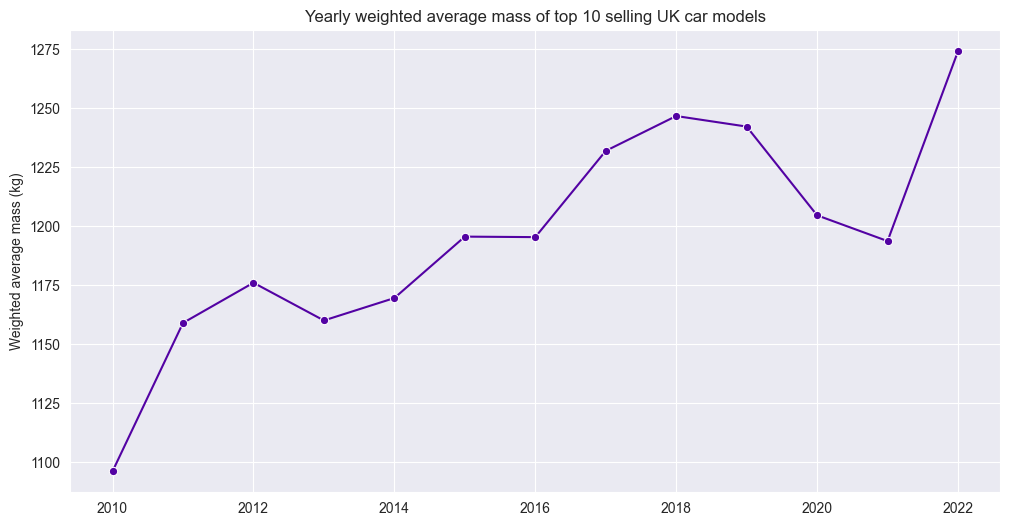

In [218]:
# Weighted average car mass by year


# Initialize a dictionary to store the results
yearly_weighted_averages = {}

# Iterate through the year columns
for year in range(2010, 2023):
    total_weighted_sum = 0
    total_cars_sold = 0

    # Iterate through the rows
    for index, row in sales_df.iterrows():
        model = row['Model']

        # Check if the year column has a non-null value
        if not pd.isna(row[year]):
            # Get the weight using both model and year
            weight = car_weights.get((model, year), 0)
            cars_sold = row[year]  # Number of cars sold for this model in this year
            total_weighted_sum += weight * cars_sold
            total_cars_sold += cars_sold

    # Calculate the weighted average weight for the year
    if total_cars_sold > 0:
        weighted_average_weight = total_weighted_sum / total_cars_sold
        yearly_weighted_averages[year] = weighted_average_weight

# Create a DataFrame from the dictionary for plotting
weighted_average_df = pd.DataFrame(list(yearly_weighted_averages.items()), columns=['Year', 'Weighted Average Weight'])

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=weighted_average_df, x='Year', y='Weighted Average Weight', marker='o')
plt.title('Yearly weighted average mass of top 10 selling UK car models')
plt.xlabel('')
plt.ylabel('Weighted average mass (kg)')
plt.grid(True)
plt.show()


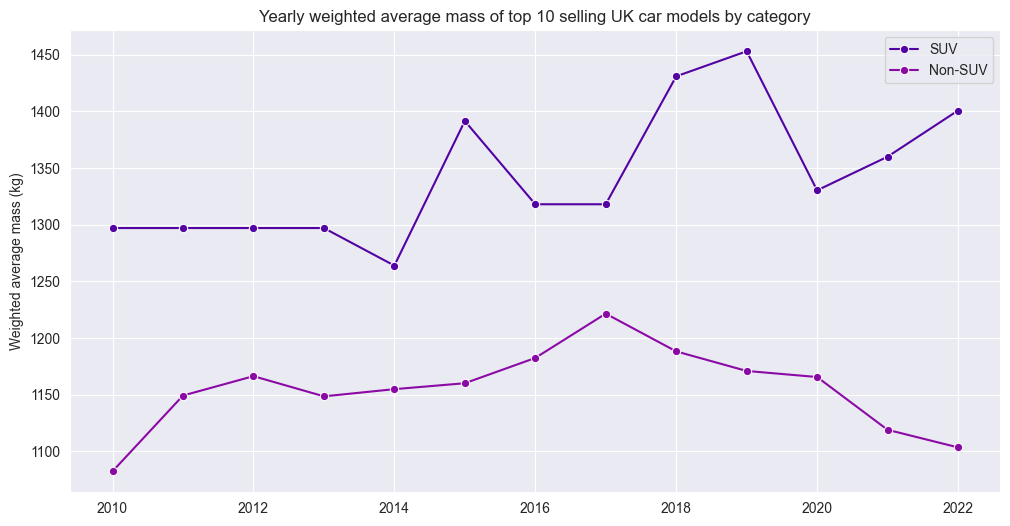

In [219]:
# Weighted average car mass by year, split SUV and non-SUV


# Initialize dictionaries to store the results for SUVs and non-SUVs
yearly_suv_weighted_averages = {}
yearly_non_suv_weighted_averages = {}

# Iterate through the year columns
for year in range(2010, 2023):
    total_suv_weighted_sum = 0
    total_non_suv_weighted_sum = 0
    total_suv_cars_sold = 0
    total_non_suv_cars_sold = 0

    # Iterate through the rows
    for index, row in sales_df.iterrows():
        model = row['Model']

        # Check if the year column has a non-null value
        if not pd.isna(row[year]):
            # Get the weight using both model and year
            weight = car_weights.get((model, year), 0)
            cars_sold = row[year]  # Number of cars sold for this model in this year

            # Check if there is a matching entry in weight_df
            matching_entry = weight_df[(weight_df['Model'] == model) & (weight_df['Year'] == year)]
            if not matching_entry.empty:
                is_suv = matching_entry['SUV'].values[0]
                #print('SUV test: ', is_suv)

                if is_suv == 1:
                    total_suv_weighted_sum += weight * cars_sold
                    total_suv_cars_sold += cars_sold
                else:
                    total_non_suv_weighted_sum += weight * cars_sold
                    total_non_suv_cars_sold += cars_sold

    # Calculate the weighted average weight for SUVs and non-SUVs for the year
    if total_suv_cars_sold > 0:
        suv_weighted_average_weight = total_suv_weighted_sum / total_suv_cars_sold
        yearly_suv_weighted_averages[year] = suv_weighted_average_weight

    if total_non_suv_cars_sold > 0:
        non_suv_weighted_average_weight = total_non_suv_weighted_sum / total_non_suv_cars_sold
        yearly_non_suv_weighted_averages[year] = non_suv_weighted_average_weight

# Create DataFrames from the dictionaries for plotting
suv_weighted_average_df = pd.DataFrame(list(yearly_suv_weighted_averages.items()), columns=['Year', 'SUV Weighted Average Weight'])
non_suv_weighted_average_df = pd.DataFrame(list(yearly_non_suv_weighted_averages.items()), columns=['Year', 'Non-SUV Weighted Average Weight'])

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=suv_weighted_average_df, x='Year', y='SUV Weighted Average Weight', label='SUV', marker='o')
sns.lineplot(data=non_suv_weighted_average_df, x='Year', y='Non-SUV Weighted Average Weight', label='Non-SUV', marker='o')
plt.title('Yearly weighted average mass of top 10 selling UK car models by category')
plt.xlabel('')
plt.ylabel('Weighted average mass (kg)')
plt.legend()
plt.grid(True)
plt.show()


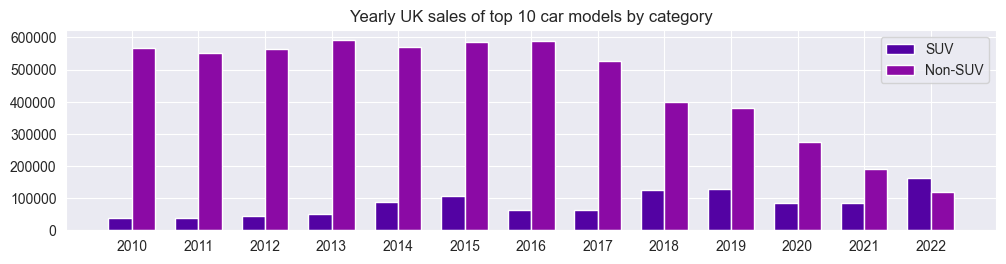

In [220]:
# Yearly sales of SUVs and non-SUVs



# Initialize a dictionary to store the results for SUVs and non-SUVs sold each year
yearly_suv_sales = {}
yearly_non_suv_sales = {}

# Iterate through the year columns (2010 to 2023)
for year in range(2010, 2023):
    suv_cars_sold = 0
    non_suv_cars_sold = 0

    # Iterate through the rows
    for index, row in sales_df.iterrows():
        # Check if the year column has a non-null value
        if not pd.isna(row[year]):
            model = row['Model']

            # Find matching entries in weight_df
            matching_entries = weight_df[(weight_df['Model'] == model) & (weight_df['Year'] == year)]

            if not matching_entries.empty:
                is_suv = matching_entries['SUV'].values[0]

                if is_suv == 1:
                    suv_cars_sold += row[year]
                else:
                    non_suv_cars_sold += row[year]

    # Store the results for the year
    yearly_suv_sales[year] = suv_cars_sold
    yearly_non_suv_sales[year] = non_suv_cars_sold

# Create DataFrames from the dictionaries for plotting
suv_sales_df = pd.DataFrame(list(yearly_suv_sales.items()), columns=['Year', 'SUV Sales'])
non_suv_sales_df = pd.DataFrame(list(yearly_non_suv_sales.items()), columns=['Year', 'Non-SUV Sales'])

# Plotting the non-stacked bar chart
plt.figure(figsize=(12, 2.6))
bar_width = 0.35
index = range(len(suv_sales_df['Year']))
plt.bar(index, suv_sales_df['SUV Sales'], width=bar_width, label='SUV')
plt.bar([i + bar_width for i in index], non_suv_sales_df['Non-SUV Sales'], width=bar_width, label='Non-SUV')
#plt.xlabel('Year')
plt.xticks([i + bar_width / 2 for i in index], suv_sales_df['Year'])


plt.title('Yearly UK sales of top 10 car models by category')
#plt.ylabel('Number of cars sold')
plt.legend()
plt.grid(True)
plt.show()



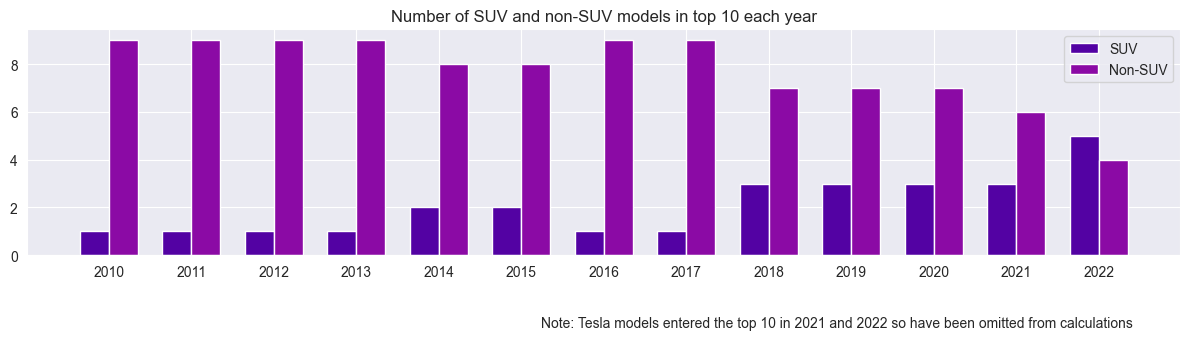

In [226]:

# Initialize lists to store SUV and Non-SUV model counts for each year
suv_model_counts = []
non_suv_model_counts = []

# Iterate through the year columns
for year in range(2010, 2023):
    suv_models = set()
    non_suv_models = set()

    # Iterate through the rows
    for index, row in sales_df.iterrows():
        model = row['Model']

        
             # Check if the year column has a non-null value
        if not pd.isna(row[year]):
            # Get the CO2 emissions using both model and year
            co2_emissions = car_co2_emissions.get((model, year), 0)
            cars_sold = row[year]  # Number of cars sold for this model in this year

            # Check if there is a matching entry in weight_df
            matching_entry = weight_df[(weight_df['Model'] == model) & (weight_df['Year'] == year)]
            if not matching_entry.empty:
                is_suv = matching_entry['SUV'].values[0]
            
                if is_suv == 1:
                    suv_models.add(model)
                else:
                    non_suv_models.add(model)
                #print('SUVs: ', suv_models, 'Non-SUVs: ', non_suv_models)

    # Append counts for SUV and Non-SUV models for the year
    suv_model_counts.append(len(suv_models))
    non_suv_model_counts.append(len(non_suv_models))

# Plotting the bar chart
plt.figure(figsize=(12, 3))
bar_width = 0.35
index = range(len(range(2010, 2023)))

plt.bar(index, suv_model_counts, bar_width, label='SUV')
plt.bar([i + bar_width for i in index], non_suv_model_counts, bar_width, label='Non-SUV')

#plt.xlabel('Year')
#plt.ylabel('Number of Models')
plt.title('Number of SUV and non-SUV models in top 10 each year')
plt.xticks([i + bar_width / 2 for i in index], range(2010, 2023))
plt.legend()
plt.tight_layout()


# Add a note below the x-axis label
plt.text(9, -3, 'Note: Tesla models entered the top 10 in 2021 and 2022 so have been omitted from calculations', fontsize=10, ha='center')

plt.show()


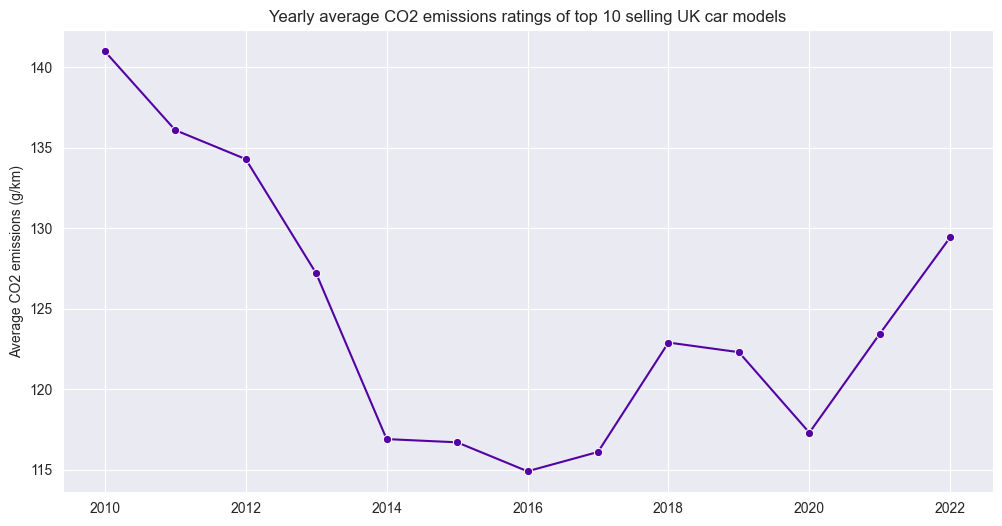

In [221]:
# Yearly average CO2 emissions ratings for top ten cars

# Create a dictionary that maps (Model, Year) to CO2
car_co2_emissions = {(model, year): co2 for model, year, co2 in zip(weight_df['Model'], weight_df['Year'], weight_df['CO2'])}

# Initialize a dictionary to store the results
yearly_average_co2_emissions = {}

# Iterate through the year columns
for year in range(2010, 2023): 
    total_co2_emissions = 0
    total_cars = 0

    # Iterate through the rows
    for index, row in sales_df.iterrows():
        model = row['Model']

        # Check if the year column has a non-null value
        if not pd.isna(row[year]):
            # Get the CO2 emissions using both model and year
            co2_emissions = car_co2_emissions.get((model, year), 0)
            total_co2_emissions += co2_emissions
            total_cars += 1

    # Calculate the average CO2 emissions for the year
    if total_cars > 0:
        average_co2_emissions = total_co2_emissions / total_cars
        yearly_average_co2_emissions[year] = average_co2_emissions


# Create a DataFrame from the dictionary for plotting
average_co2_df = pd.DataFrame(list(yearly_average_co2_emissions.items()), columns=['Year', 'Average CO2 Emissions'])

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_co2_df, x='Year', y='Average CO2 Emissions', marker='o')
plt.title('Yearly average CO2 emissions ratings of top 10 selling UK car models')
plt.xlabel('')
plt.ylabel('Average CO2 emissions (g/km)')
plt.grid(True)
plt.show()


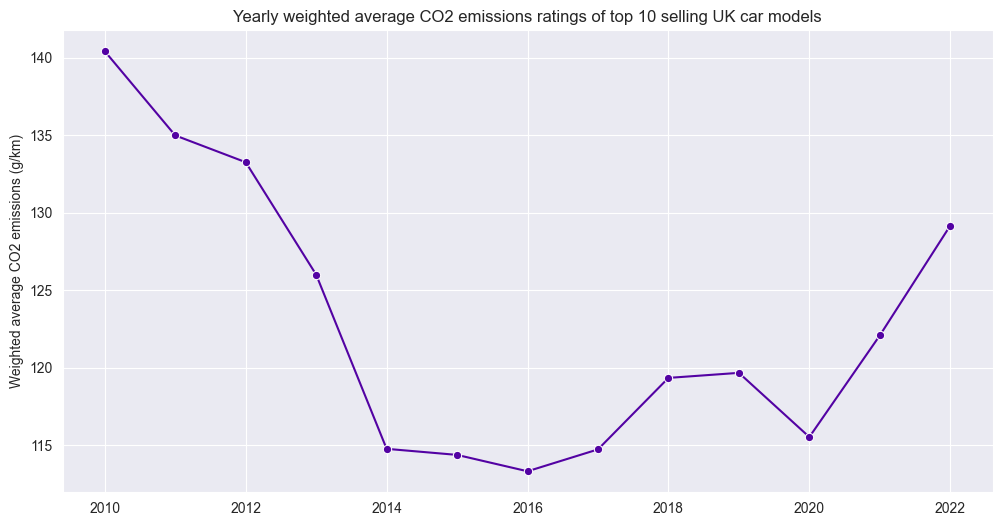

In [222]:
# # Weighted average CO2 emissions ratings by year

# Initialize a dictionary to store the results
yearly_weighted_averages_co2 = {}

# Iterate through the year columns
for year in range(2010, 2023):
    total_weighted_co2_emissions = 0
    total_cars_sold = 0

    # Iterate through the rows
    for index, row in sales_df.iterrows():
        model = row['Model']

        # Check if the year column has a non-null value
        if not pd.isna(row[year]):
            # Get the CO2 emissions using both model and year
            co2_emissions = car_co2_emissions.get((model, year), 0)
            cars_sold = row[year]  # Number of cars sold for this model in this year
            total_weighted_co2_emissions += co2_emissions * cars_sold
            total_cars_sold += cars_sold

    # Calculate the weighted average CO2 emissions for the year
    if total_cars_sold > 0:
        weighted_average_co2_emissions = total_weighted_co2_emissions / total_cars_sold
        yearly_weighted_averages_co2[year] = weighted_average_co2_emissions

# Create a DataFrame from the dictionary for plotting
weighted_average_co2_df = pd.DataFrame(list(yearly_weighted_averages_co2.items()), columns=['Year', 'Weighted Average CO2 Emissions'])

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=weighted_average_co2_df, x='Year', y='Weighted Average CO2 Emissions', marker='o')
plt.title('Yearly weighted average CO2 emissions ratings of top 10 selling UK car models')
plt.xlabel('')
plt.ylabel('Weighted average CO2 emissions (g/km)')
plt.grid(True)
plt.show()


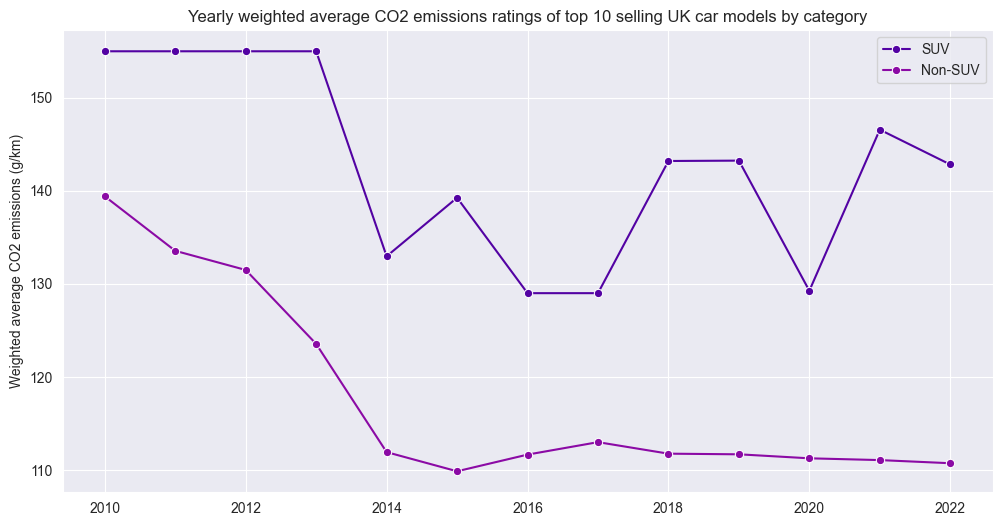

In [223]:
# Weighted average CO2 emissions by year, split SUV and non-SUV


# Initialize dictionaries to store the results for SUVs and non-SUVs
yearly_weighted_averages_suv = {}
yearly_weighted_averages_non_suv = {}

# Iterate through the year columns
for year in range(2010, 2023):
    total_weighted_co2_emissions_suv = 0
    total_cars_sold_suv = 0
    total_weighted_co2_emissions_non_suv = 0
    total_cars_sold_non_suv = 0

    # Iterate through the rows
    for index, row in sales_df.iterrows():
        model = row['Model']

        # Check if the year column has a non-null value
        if not pd.isna(row[year]):
            # Get the CO2 emissions using both model and year
            co2_emissions = car_co2_emissions.get((model, year), 0)
            cars_sold = row[year]  # Number of cars sold for this model in this year

            # Check if there is a matching entry in weight_df
            matching_entry = weight_df[(weight_df['Model'] == model) & (weight_df['Year'] == year)]
            if not matching_entry.empty:
                is_suv = matching_entry['SUV'].values[0]

                if is_suv == 1:
                    total_weighted_co2_emissions_suv += co2_emissions * cars_sold
                    total_cars_sold_suv += cars_sold
                else:
                    total_weighted_co2_emissions_non_suv += co2_emissions * cars_sold
                    total_cars_sold_non_suv += cars_sold

    # Calculate the weighted average CO2 emissions for SUVs and non-SUVs for the year
    if total_cars_sold_suv > 0:
        weighted_average_co2_emissions_suv = total_weighted_co2_emissions_suv / total_cars_sold_suv
        yearly_weighted_averages_suv[year] = weighted_average_co2_emissions_suv

    if total_cars_sold_non_suv > 0:
        weighted_average_co2_emissions_non_suv = total_weighted_co2_emissions_non_suv / total_cars_sold_non_suv
        yearly_weighted_averages_non_suv[year] = weighted_average_co2_emissions_non_suv

# Create DataFrames from the dictionaries for plotting
weighted_average_co2_df_suv = pd.DataFrame(list(yearly_weighted_averages_suv.items()), columns=['Year', 'SUV Weighted Average CO2 Emissions'])
weighted_average_co2_df_non_suv = pd.DataFrame(list(yearly_weighted_averages_non_suv.items()), columns=['Year', 'Non-SUV Weighted Average CO2 Emissions'])

# Plot the data for SUV and non-SUV
plt.figure(figsize=(12, 6))
sns.lineplot(data=weighted_average_co2_df_suv, x='Year', y='SUV Weighted Average CO2 Emissions', label='SUV', marker='o')
sns.lineplot(data=weighted_average_co2_df_non_suv, x='Year', y='Non-SUV Weighted Average CO2 Emissions', label='Non-SUV', marker='o')
plt.title('Yearly weighted average CO2 emissions ratings of top 10 selling UK car models by category')
plt.xlabel('')
plt.ylabel('Weighted average CO2 emissions (g/km)')
plt.legend()
plt.grid(True)
plt.show()


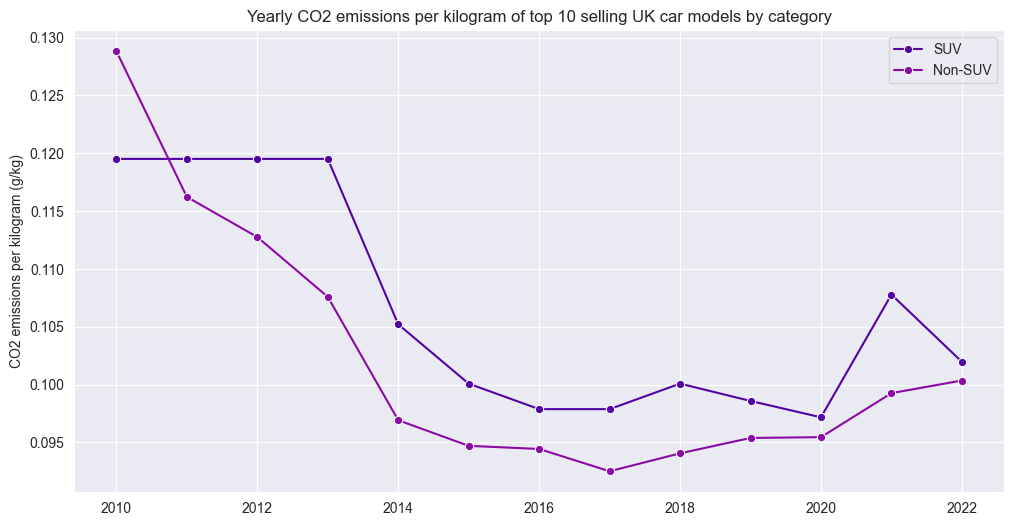

In [228]:
# Initialize dictionaries to store the results for SUVs and non-SUVs
yearly_suv_co2_per_kg = {}
yearly_non_suv_co2_per_kg = {}

# Iterate through the year columns
for year in range(2010, 2023):
    total_suv_co2_sum = 0
    total_non_suv_co2_sum = 0
    total_suv_weight_sum = 0
    total_non_suv_weight_sum = 0

    # Iterate through the rows
    for index, row in sales_df.iterrows():
        model = row['Model']

        # Check if the year column has a non-null value
        if not pd.isna(row[year]):
            weight = car_weights.get((model, year), 0)
            cars_sold = row[year]  # Number of cars sold for this model in this year

            matching_entry = weight_df[(weight_df['Model'] == model) & (weight_df['Year'] == year)]
            if not matching_entry.empty:
                is_suv = matching_entry['SUV'].values[0]
                co2_emission = matching_entry['CO2'].values[0]  # CO2 emission for this model in this year

                if is_suv == 1:
                    total_suv_co2_sum += co2_emission * cars_sold
                    total_suv_weight_sum += weight * cars_sold
                else:
                    total_non_suv_co2_sum += co2_emission * cars_sold
                    total_non_suv_weight_sum += weight * cars_sold

    # Calculate CO2 emissions per kilogram for SUVs and non-SUVs for the year
    if total_suv_weight_sum > 0:
        suv_co2_per_kg = total_suv_co2_sum / total_suv_weight_sum
        yearly_suv_co2_per_kg[year] = suv_co2_per_kg

    if total_non_suv_weight_sum > 0:
        non_suv_co2_per_kg = total_non_suv_co2_sum / total_non_suv_weight_sum
        yearly_non_suv_co2_per_kg[year] = non_suv_co2_per_kg

# Create DataFrames from the dictionaries for plotting
suv_co2_per_kg_df = pd.DataFrame(list(yearly_suv_co2_per_kg.items()), columns=['Year', 'SUV CO2 per kg'])
non_suv_co2_per_kg_df = pd.DataFrame(list(yearly_non_suv_co2_per_kg.items()), columns=['Year', 'Non-SUV CO2 per kg'])

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=suv_co2_per_kg_df, x='Year', y='SUV CO2 per kg', label='SUV', marker='o')
sns.lineplot(data=non_suv_co2_per_kg_df, x='Year', y='Non-SUV CO2 per kg', label='Non-SUV', marker='o')
plt.title('Yearly CO2 emissions per kilogram of top 10 selling UK car models by category')
plt.xlabel('')
plt.ylabel('CO2 emissions per kilogram (g/kg)')
plt.legend()
plt.grid(True)
plt.show()
